In [2]:
import os
from glob import glob
import re
import logging
from tqdm import tqdm
from itertools import chain

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
from torch.utils.data import Dataset,DataLoader,random_split
import torchvision.transforms as transforms
from PIL import Image
import albumentations as A

from models import encoders, decoders
from src import datasets, utils, metrics

/home/mh613/miniconda3/envs/ee2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
df=pd.read_csv("mage_1095.csv")

In [5]:
df=pd.read_csv("age_1095.csv")

In [1]:
import pandas as pd
df=pd.read_csv("i_1095.csv")

In [2]:
df

,Unnamed: 0,datasize,encoder,trial,iou,max_f1
0,0,1095,swav-b3,0,0.39784,1


In [6]:
df

,Unnamed: 0,datasize,encoder,trial,iou,max_f1
0,0,1095,imagenet,0,0.442424,0.624081


In [4]:
df

,Unnamed: 0,datasize,encoder,trial,iou,max_f1
0,0,1095,swav-b3,0,0.401584,0.588464


In [3]:
import pandas as pd
df=pd.read_csv("BaseRe50.csv")

In [5]:
dfcopy=df[['encoder','iou','max_f1']].copy()
dfcopy.loc[2, ['encoder']] = ["swav-RGB"]


In [ ]:
dfcopy.loc[0,['encoder']]=["Re"]

In [6]:
dfcopy

,encoder,iou,max_f1
0,none,0.326314,0.526639
1,imagenet,0.441591,0.616691
2,swav-RGB,0.369402,0.555511
3,swav-12,0.448873,0.634677


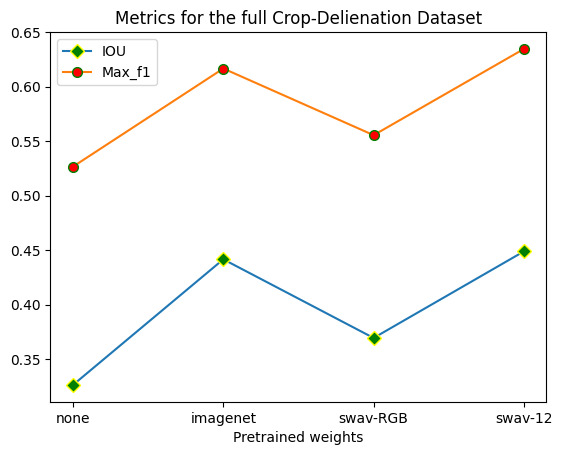

In [12]:
import matplotlib.pyplot as plt
#plt.plot(dfcopy.encoder,dfcopy.iou,label=[dfcopy.iou,dfcopy.max_f1])
plt.plot(dfcopy.encoder,dfcopy.iou, marker='D', mfc='green', mec='yellow',ms='7')
plt.plot(dfcopy.encoder,dfcopy.max_f1, marker='o', mfc='red', mec='green',ms='7')
plt.xlabel("Pretrained weights")

# set label name of x-axis title
#plt.ylabel("Number of Employees")

# set label name of chart title
plt.title("Metrics for the full Crop-Delienation Dataset")

plt.legend(['IOU','Max_f1'])
plt.show()

In [3]:
main_list=[i.split(".")[0] for i in os.listdir("/home/mh613/ssrs/crop_delineation/imgs")]
second_list=[i.split(".")[0] for i in os.listdir("/scratch/yc506/crop_delineation/batch")]
liste=[]
for i in main_list:
    if i not in second_list:
        liste.append(i)

In [14]:
liste=[]
for i in main_list:
    if i not in second_list:
        liste.append(i)

In [15]:
file = open('items.txt','w')
for item in liste:
	file.write(item+"\n")
file.close()

In [8]:
liste

['1461492',
 '4860350',
 '5865702',
 '9411619',
 '9805837',
 '5534058',
 '7368574',
 '10906622',
 '475971',
 '3021331',
 '7551345',
 '387931',
 '10350315',
 '7387934',
 '1329560',
 '10385464',
 '1293387',
 '4033062',
 '10704660',
 '5265984',
 '3571025',
 '8622784',
 '8524551',
 '5922855',
 '4745648',
 '5435596',
 '1155609',
 '2563627',
 '4012077',
 '1245763',
 '11217387',
 '8565121',
 '1163840',
 '3999332',
 '4535836',
 '4322865',
 '10729180',
 '7823280',
 '1318192',
 '295714',
 '2108277',
 '9892761',
 '5501790',
 '4117167',
 '4020842',
 '3510684',
 '6311085',
 '158644',
 '2124578',
 '8710926',
 '7880824',
 '10508357',
 '3944344',
 '3105539',
 '4004819',
 '4735237',
 '8765632',
 '6224199',
 '2961972',
 '10023794',
 '2491109',
 '10755130',
 '3019937',
 '4038653',
 '11119555',
 '1556591',
 '5421704',
 '9611055',
 '5086963',
 '6854272',
 '1561576',
 '5882510',
 '1141180',
 '1385912',
 '4566265',
 '352727',
 '5949775',
 '2335861',
 '7622482',
 '6659923',
 '1437971',
 '10447777',
 '2373608'

In [23]:
len(main_list)
[  0.08085115   0.10560495   0.11305504   0.15193472   0.23100034
   0.26040642   0.27116834   0.27965903   0.22335568   0.15916657
 -10.64911749 -17.75571749]
[0.11407911 0.11239209 0.12551088 0.12173247 0.11697621 0.1226123
 0.12686087 0.12272862 0.10897356 0.10374145 4.03370198 4.35642499]

1991

In [ ]:
[ 808.51146565 1056.04945518 1130.55039879 1519.34724763 2310.00341365
 2604.06418074 2711.6833528  2796.59029076 2233.55684355 1591.66572806
  -10.64911749  -17.75571749]

In [22]:
len(second_list)

1180

In [ ]:
for i in main_list:
    if i not in second_list:
        print(i)

In [7]:
second_list[0].split(".")[0]

'6476423'

In [2]:
class arguments():
    def __init__(self) -> None:
        pass
    
global args
args = arguments()
args.log_level = "INFO"
args.dump_path = './results/field_delineation'

try:
    os.makedirs(args.dump_path)
except FileExistsError:
    print("Please delete the target directory if you would like to proceed.")

  
# Set up logger and log the arguments
def set_up_logger():
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)
    logging.basicConfig(
        filename=os.path.join(args.dump_path, "output.log"),
        filemode="w",
        level=args.log_level,
        format="%(asctime)s - %(levelname)s - %(message)s",
    )
      
set_up_logger()
logging.info(args)
# Set up timer to time results
overall_timer = utils.Timer()


Please delete the target directory if you would like to proceed.


LOADING THE DATA

In [3]:
def matchImageWithMask_crop(img_folder, mask_folder):
    img_filepaths = glob(os.path.join( img_folder ,"*.jpeg"))
    mask_filepaths = glob(os.path.join(mask_folder,"*.png"))

    img_names  = [int(re.search("\d+",os.path.basename(x)).group(0)) for x in img_filepaths]
    mask_names = [int(re.search("\d+",os.path.basename(x)).group(0)) for x in mask_filepaths]
    #mask_names.sort()

    img_filepaths_keep = []#os.path.join(img_folder,str(name)+'.jpeg') for name in self.img_names]
    mask_filepaths_keep = []#os.path.join(mask_folder,str(name)+'png') for name in self.img_names] # same name

    num_matched = 0
    unmatched_names = []
    for name in tqdm(img_names):
        if name in mask_names:
            img_path = os.path.join(img_folder,str(name)+'.jpeg')
            mask_path = os.path.join(mask_folder,str(name)+'.png')
            img_filepaths_keep.append(img_path)
            mask_filepaths_keep.append(mask_path)
            num_matched += 1
        else:
            unmatched_names.append(name)
            logging.info(f"image {name} has no matching mask")
    print(f"{len(img_filepaths_keep)} images has matched masks, {len(unmatched_names)}/{len(img_names)} images have no matching masks")
    logging.info(f"{len(img_filepaths_keep)} images has matched masks, {len(unmatched_names)}/{len(img_names)} images have no matching masks")
    
    return img_filepaths_keep,mask_filepaths_keep,unmatched_names

def split_train_test(img_filepaths,mask_filepaths,test_percent = 0.2, seed=123):
    N = len(img_filepaths)
    test_size  = int(N*test_percent)

    random.seed(seed)
    test_idx = random.sample(range(N),test_size )
    train_idx = [ elem for elem in range(N) if elem not in test_idx]
    train_img_filepaths = np.array(img_filepaths)[train_idx]
    train_mask_filepaths = np.array(mask_filepaths)[train_idx]
    test_img_filepaths = np.array(img_filepaths)[test_idx]
    test_mask_filepaths = np.array(mask_filepaths)[test_idx]
    
    return train_img_filepaths,train_mask_filepaths,test_img_filepaths,test_mask_filepaths

    
    
#img_folder = "/scratch/yc506/crop_delineation/batch/"
img_folder = "./crop_delineation/imgs"
mask_folder = "./crop_delineation/masks"  

# train: test: val = 6: 2: 2
test_percent = 0.2
val_percent = 0.2

img_filepaths_keep, mask_filepaths_keep,unmatched_names =  matchImageWithMask_crop(img_folder, mask_folder)
train_img_filepaths,train_mask_filepaths,test_img_filepaths,test_mask_filepaths  = split_train_test(img_filepaths_keep,mask_filepaths_keep,
                                                                                    test_percent = 0.2, seed=123)
train_img_filepaths,train_mask_filepaths,val_img_filepaths,val_mask_filepaths  = split_train_test(train_img_filepaths,train_mask_filepaths,
                                                                                     test_percent = val_percent/(1-test_percent), seed=123)

100%|██████████| 1991/1991 [00:00<00:00, 176674.20it/s]

1966 images has matched masks, 25/1991 images have no matching masks


In [4]:
# Image dimension in PyTorch (B, C, H, W)
# Image dimension in Numpy  (H, W, C)

def img_np2torch_dim(X):
    X_ = np.vstack([np.expand_dims(X[:,:,i],0) for i in range(3)])
    return X_

def img_torch2np(X):
    X_ = X.permute((1,2,0))
    X_ = X_.numpy()
    return X_


def get_mean_and_std(dataloader):
    # function to compute mean and std over an image collection -> for image normalization
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for i,(X,y) in enumerate(dataloader):
        # Mean over batch, height and width, but not over the channels
        channels_sum += torch.mean(X, dim=[0,2,3])
        channels_squared_sum += torch.mean(X**2, dim=[0,2,3])
        num_batches += 1
    
    mean = channels_sum / num_batches
    # std = sqrt(E[X^2] - (E[X])^2)
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

In [5]:
# define fieldDelineationDataset using PyTorch Dataset

class fieldDelineationDataset(Dataset):
    def __init__(self, image_filepaths,mask_filepaths,transform=None, augmentations=None):
        
    
        self.transform = transform
        self.aug = augmentations

        self.img_names  = [int(re.search("\d+",os.path.basename(x)).group(0)) for x in image_filepaths]
        
        self.img_filepaths = []#os.path.join(img_folder,str(name)+'.jpeg') for name in self.img_names]
        self.mask_filepaths = []#os.path.join(mask_folder,str(name)+'png') for name in self.img_names] # same name

        self.images = []
        self.masks = []
        num_unmatched = 0
        for i in tqdm(range(len(self.img_names[::10]))):
            try:
                im  = np.asarray(Image.open(image_filepaths[i]))
                mask  = np.asarray(Image.open(mask_filepaths[i]))
                self.img_filepaths.append(image_filepaths[i])
                self.mask_filepaths.append(image_filepaths[i])
                self.images.append(im)
                self.masks.append(mask)
            except:
                num_unmatched += 1
        logging.info(f"{len(self.images)} images has matched masks, {num_unmatched} images have no matching masks")
        print(f"{len(self.images)} images has matched masks, {num_unmatched} images have no matching masks")
        
    def __len__(self):
        return len(self.images)
        
    def __getitem__(self, index: int):
    
        X = self.images[index]
        y = self.masks[index]
        y = y/255

        
        # apply agumentation using albumentations: 
        # albumentations works best with numpym augment then transform to tensor
        # apply augmenation on mask and image together
        if self.aug:
            augmented_X_y =  self.aug(image=X, mask =y)
            X = augmented_X_y ['image']
            y = augmented_X_y ['mask']
            
        y = np.expand_dims(y,0)
        y = torch.from_numpy(y)
        # apply transformation
        if self.transform:
            X = self.transform(X)
        else:
            # by default, turn numpy to tensor, adjust dimension
            X = img_np2torch_dim(X)
            X = torch.from_numpy(X)
        
        return X.type(torch.FloatTensor), y.type(torch.LongTensor)

In [6]:
compute_normalization_params =  True

# load train without any transformation to compute mean and std
train_dataset = fieldDelineationDataset(train_img_filepaths,train_mask_filepaths,
                                            transform=transforms.ToTensor())
if compute_normalization_params:
    torch.manual_seed(12)
    train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
    mean, std = get_mean_and_std(train_loader)
    print(mean, std)
else:
    mean= [0.2397, 0.2972, 0.3173]
    std = [0.1876, 0.1223, 0.1136]

100%|██████████| 118/118 [00:00<00:00, 753.32it/s]
/home/mh613/miniconda3/envs/ee2/lib/python3.10/site-packages/torchvision/transforms/functional.py:149: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642969563/work/torch/csrc/utils/tensor_numpy.cpp:199.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


118 images has matched masks, 0 images have no matching masks
tensor([0.2408, 0.3050, 0.3271]) tensor([0.1796, 0.1163, 0.1088])


In [7]:
transform_norm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# invert transfomration when plotting
invTrans = transforms.Compose([ transforms.Normalize(mean = [ -mean[i]/std[i] for i in range(3)],
                                                     std = [ 1/std[i] for i in range(3) ]),
                               ])

In [8]:
prob = 0.25
aug = A.Compose(
            [
                A.RandomRotate90(p= prob),
                A.VerticalFlip(p = prob),
                A.HorizontalFlip(p = prob),
                A.Transpose(p = prob),
            ]
        )


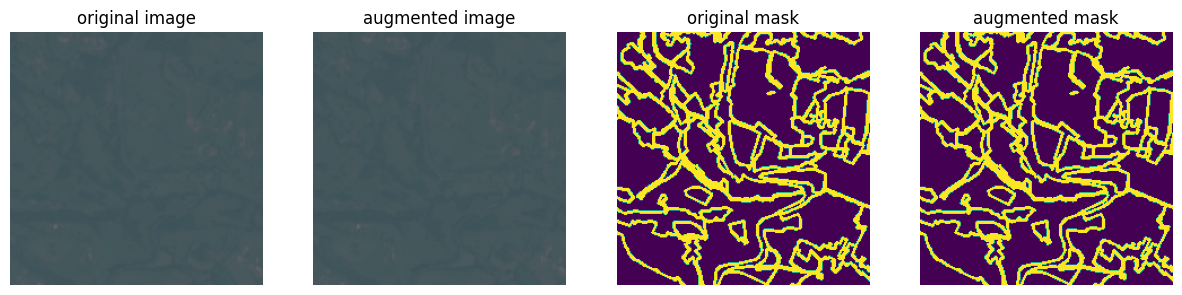

In [9]:
# check augmentation
X,y =train_dataset[20]
X_ = img_torch2np(invTrans(X))
y_ = img_torch2np(y)
X_aug = aug(image  = X_,mask = y_)
fig, ax= plt.subplots(1,4,figsize=(15,60))
ax[0].imshow(X_)
ax[0].set_title("original image")
ax[0].axis('off')
ax[1].imshow(X_aug['image'])
ax[1].set_title("augmented image")
ax[1].axis("off")
ax[2].imshow(y_)
ax[2].set_title("original mask")
ax[2].axis("off")
ax[3].imshow(X_aug['mask'])
ax[3].set_title("augmented mask")
ax[3].axis("off")
plt.show()

In [10]:

# update train dataset's transfromation and augmentation
train_dataset.transform = transform_norm
train_dataset.aug = aug
# load validation
valid_dataset = fieldDelineationDataset(val_img_filepaths,val_mask_filepaths,
                                        transform=transform_norm)

100%|██████████| 40/40 [00:00<00:00, 777.98it/s]

40 images has matched masks, 0 images have no matching masks


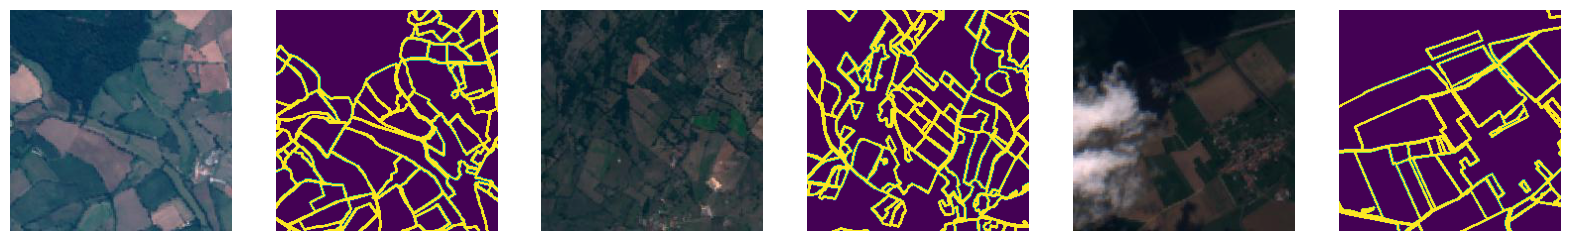

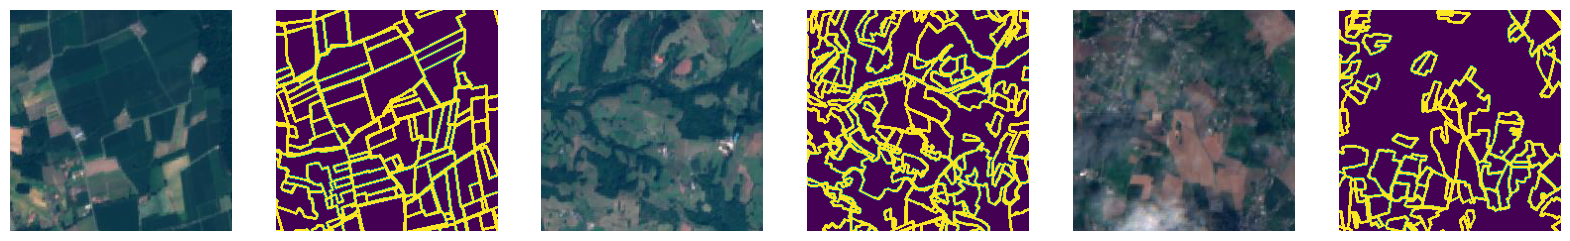

In [11]:
N = 3
fig,axes = plt.subplots(1,2*N,figsize=(20,8))
for i in range(N):
    X,y =train_dataset[i]
    X_ = img_torch2np(invTrans(X)) # apply invert normlaization for visualization
    y_ = img_torch2np(y)
    axes[2*i+0].imshow(X_)
    axes[2*i+1].imshow(y_)
    axes[2*i+0].axis('off')
    axes[2*i+1].axis('off')
plt.show()


N = 3
fig,axes = plt.subplots(1,2*N,figsize=(20,8))
for i in range(N):
    X,y =valid_dataset[i]
    X_ = img_torch2np(invTrans(X))
    y_ = img_torch2np(y)
    axes[2*i+0].imshow(X_)
    axes[2*i+1].imshow(y_)
    axes[2*i+0].axis('off')
    axes[2*i+1].axis('off')
plt.show()



LOAD SWAV ENCODER

In [12]:
args.encoder = 'swav'
args.decoder = 'unet'
args.fine_tune_encoder = True


pretrain = "geoNet_subset"
# pretrain = "imagenet"
swav_encoder_path = "/home/mh613/updatedswav/rgbpaaath/checkpoints/ckp-19-eval.pth"

if pretrain == "imagenet":  
    encoder = encoders.load("swav")
else:
    encoder = encoders._load_swav_pretrained(swav_encoder_path)

#the first layer of the decoder depends on encoder dimension
decoder = decoders.load(args.decoder, encoder) 

TRAINING

In [13]:
#  whether we are fine-tuning encoder or not
args.fine_tune_encoder = False # True
if args.fine_tune_encoder:
    # Chain the iterators to combine them.
    params = list(encoder.parameters())+list( decoder.parameters())
else:
    params = decoder.parameters()

In [14]:
def set_device(d):
    if d == "auto":
        device = "cuda" if torch.cuda.is_available() else "cpu"
    else:
        device = d
    return device

# set up where to train the model
global DEVICE
args.device  = 'cpu'
DEVICE = set_device(args.device)
print("Device is " + DEVICE)
encoder = encoder.to(DEVICE)
decoder = decoder.to(DEVICE)

# learning hyperparameters, and loss
args.lr = 1e-3
args.weight_decay  = 0.0
args.criterion = "softiou"
args.epochs = 10
args.batch_size = 20

# define data loader given batch size
train_loader = DataLoader(
    train_dataset, batch_size=args.batch_size, shuffle=True)
valid_loader = DataLoader(
    valid_dataset, batch_size=args.batch_size, shuffle=False)

# set optimization algorithm
optimizer = torch.optim.Adam(
    params, lr=args.lr, weight_decay=args.weight_decay)

criterion = metrics.load(args.criterion, DEVICE)

Device is cpu


TRAIN

In [15]:
def save_model(enc, dec, dump_path, name):
    torch.save(enc.state_dict(), os.path.join(dump_path, "enc_" + name))
    torch.save(dec.state_dict(), os.path.join(dump_path, "dec_" + name))
    
def train(loader, encoder, decoder, optimizer, criterion):

    if args.fine_tune_encoder:
        encoder.train()
    else:
        encoder.eval()

    decoder.train()
    criterion = criterion.to(DEVICE)
    avg_loss = utils.AverageMeter()
    num_batches = len(loader)
    for batch_idx, (inp, target) in enumerate(loader):
        if batch_idx % 10 == 0:
            print(f"Beginning batch {batch_idx} of {num_batches}")
        logging.debug(f"Training batch {batch_idx}...")
        # Move to the GPU
        inp = inp.to(DEVICE)
        target = target.to(DEVICE)

        if args.fine_tune_encoder:
            output = encoder(inp)
        else:
            with torch.no_grad():
                output = encoder(inp)

        output = decoder(output)
        loss = criterion(output, target)

        if batch_idx % 10 == 0:
            print(f"\t Train Loss: {loss.item()}")
        # Calculate the gradients
        optimizer.zero_grad()
        loss.backward()
        avg_loss.update(loss.item(), inp.size(0))
        # Step forward
        optimizer.step()

    return avg_loss.avg

@torch.no_grad()
def test(data_loader, encoder, decoder, criterion):

    encoder.eval()
    decoder.eval()
    criterion = criterion.to(DEVICE)
    avg_loss = utils.AverageMeter()
    for batch_idx, (inp, target) in enumerate(data_loader):
        # Move to the GPU
        if batch_idx % 10 == 0:
            print(f"Testing batch {batch_idx}")
        inp = inp.to(DEVICE)
        target = target.to(DEVICE)

        # Compute output
        output = decoder(encoder(inp))
        loss = criterion(output, target)
        avg_loss.update(loss.item(), inp.size(0))
        if batch_idx % 10 == 0:
            print(f"\t Test Loss: {loss.item()}")

    return avg_loss.avg

In [16]:
epoch_timer = utils.Timer()
monitor = utils.PerformanceMonitor(args.dump_path)
best_val_loss = float("inf")


for epoch in range(args.epochs):
        print(f"Beginning epoch {epoch}")
        logging.info(f"Beginning epoch {epoch}...")

        loss_train = train(train_loader, encoder, decoder, optimizer, criterion)
        monitor.log(epoch, "train", loss_train)
        
        loss_val = test(valid_loader, encoder, decoder, criterion)
        monitor.log(epoch, "val", loss_val)
        logging.info(
            f"Epoch {epoch} took {epoch_timer.minutes_elapsed()} minutes.")
        epoch_timer.reset()

        if loss_val < best_val_loss:
            logging.info("Saving model")
            save_model(encoder, decoder, args.dump_path, "best.pt")
            best_val_loss = loss_val
save_model(encoder, decoder, args.dump_path, "final.pt")
logging.info(f"Code completed in {overall_timer.minutes_elapsed()}.")

Beginning epoch 0
Beginning batch 0 of 6
	 Train Loss: 0.5405517816543579
Testing batch 0
	 Test Loss: 0.5026241540908813
Beginning epoch 1
Beginning batch 0 of 6
	 Train Loss: 0.4253191351890564
Testing batch 0
	 Test Loss: 0.4118696451187134
Beginning epoch 2
Beginning batch 0 of 6
	 Train Loss: 0.3661680221557617
Testing batch 0
	 Test Loss: 0.4328794479370117
Beginning epoch 3
Beginning batch 0 of 6
	 Train Loss: 0.3582531213760376
Testing batch 0
	 Test Loss: 0.4122850298881531
Beginning epoch 4
Beginning batch 0 of 6
	 Train Loss: 0.34756726026535034
Testing batch 0
	 Test Loss: 0.32280606031417847
Beginning epoch 5
Beginning batch 0 of 6
	 Train Loss: 0.33935558795928955
Testing batch 0
	 Test Loss: 0.32331788539886475
Beginning epoch 6
Beginning batch 0 of 6
	 Train Loss: 0.3256642818450928
Testing batch 0
	 Test Loss: 0.3148367404937744
Beginning epoch 7
Beginning batch 0 of 6
	 Train Loss: 0.3162825107574463
Testing batch 0
	 Test Loss: 0.31305932998657227
Beginning epoch 8
B

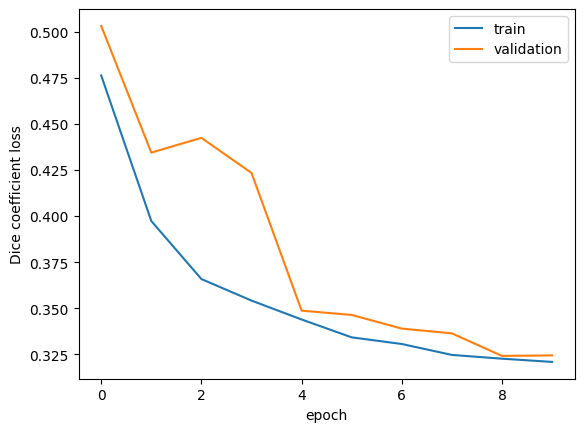

In [17]:
train_progress = pd.read_csv(os.path.join(args.dump_path,"performance.csv"))
fig,ax = plt.subplots()
ax.plot(train_progress.epoch[train_progress["stage"]=="train"],train_progress.loss[train_progress["stage"]=="train"],label="train")
ax.plot(train_progress.epoch[train_progress["stage"]=="val"],train_progress.loss[train_progress["stage"]=="val"],label="validation")
ax.set_xlabel("epoch")
ax.set_ylabel("Dice coefficient loss")
ax.legend()
plt.show()

In [18]:
bestOrFinal = "best"
weights_folder = args.dump_path #"results/field_delineation_10ep/" #
encoderWeights_path = os.path.join(weights_folder,f"enc_{bestOrFinal}.pt")
decoderWeights_path = os.path.join(weights_folder,f"dec_{bestOrFinal}.pt")

# load the weigths we saved
encoder_trained = encoders._load_swav_pretrained(encoderWeights_path)
decoder_trained = decoders.load(args.decoder,encoder)
decoder_trained.load_state_dict(torch.load(decoderWeights_path))
encoder_trained = encoder_trained.eval()
decoder_trained = decoder_trained.eval()

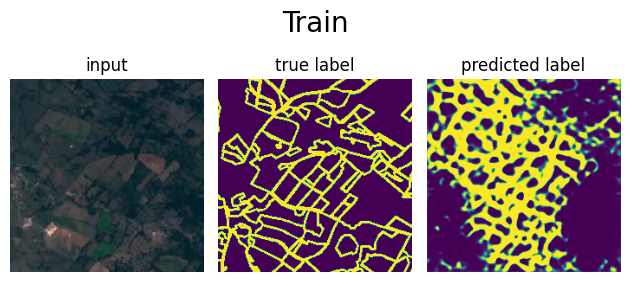

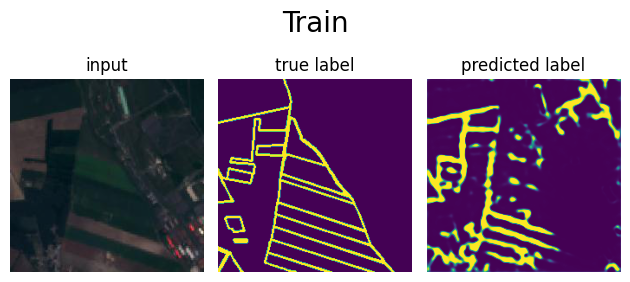

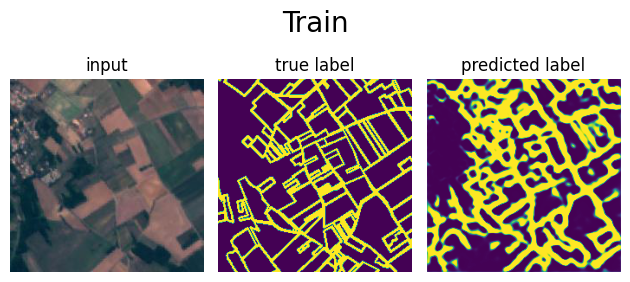

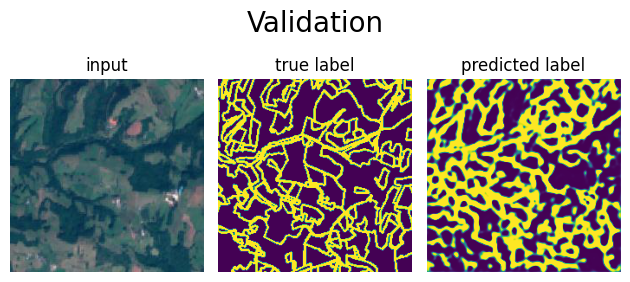

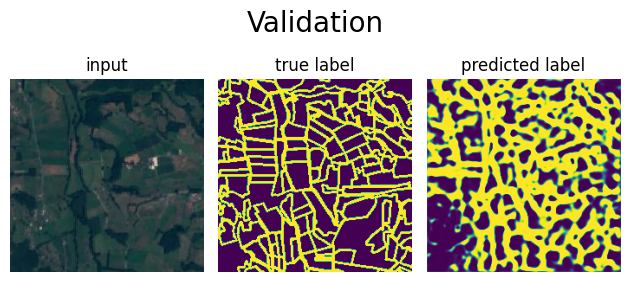

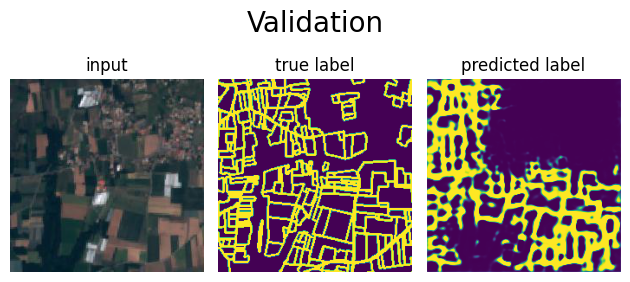

In [19]:
def plot_prediction(X0,y,pred,title):    
    fig,axes = plt.subplots(1,3)#))
    X_ = img_torch2np(invTrans(X0))
    y_ = img_torch2np(y)
    pred_np= img_torch2np(pred.detach().cpu().squeeze(0))
    axes[0].imshow(X_)
    axes[0].set_title("input")
    axes[1].imshow(y_)
    axes[1].set_title("true label")
    axes[2].imshow(pred_np)
    axes[2].set_title("predicted label")
    for i in range(3):
        axes[i].axis('off')
    fig.suptitle(title,y=0.8,fontsize=20)
    fig.tight_layout()
    plt.show()
    

for i in [1,5,7]:
    X0,y = train_dataset[i]
    X = torch.unsqueeze(X0,0)
    X = X.to(DEVICE)
    pred = decoder_trained(encoder_trained(X))
    pred_prob = torch.sigmoid(pred) # map predicted values to probabilities
    plot_prediction(X0,y,pred_prob,"Train")
    
for i in [1,5,7]:
    X0,y = valid_dataset[i]
    X = torch.unsqueeze(X0,0)
    X = X.to(DEVICE)
    pred = decoder_trained(encoder_trained(X))
    pred_prob = torch.sigmoid(pred) # map predicted values to probabilities
    plot_prediction(X0,y,pred_prob,"Validation")

In [20]:
def get_predictions(dataloader, encoder,decoder):
    preds = []
    targets = []
    for i, (img, mask) in enumerate(valid_loader):
        # Load through the model.
        img = img.to(DEVICE)
        mask = mask.to(DEVICE)
        with torch.no_grad():
            output = encoder(img)
            output = decoder(output)
            pred_prob = torch.sigmoid(output) #activation function sigmoid function
            preds.append(pred_prob .cpu().numpy())#.flatten())
            targets.append(mask.cpu().numpy())#.flatten())
            
    return np.array(preds),np.array(targets)

def get_dice_score(preds,targets,smooth = 1):
    # https://github.com/sustainlab-group/ParcelDelineation/blob/master/utils/metrics.py
    # https://discuss.pytorch.org/t/calculating-dice-coefficient/44154
    y_true_f = np.array(targets).flatten()
    y_pred_f =np.array(preds).flatten()
    intersection = np.sum(y_true_f * y_pred_f)

    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)


def get_IoU(preds,targets,thresh):
    preds_copy = np.array(preds).flatten()
    targets_f = np.array(targets).flatten()
    preds_copy[preds_copy>=thresh] = 1
    preds_copy[preds_copy<thresh] = 0
    intersection = np.logical_and(preds_copy,targets_f)
    union = np.logical_or(preds_copy,targets_f)
    iou_score = np.sum(intersection) / np.sum(union)
    
    return iou_score

In [21]:
# get test data and compute prediction

test_dataset =  fieldDelineationDataset(test_img_filepaths,test_mask_filepaths,
                                        transform=transform_norm)
test_loader = DataLoader(
    test_dataset, batch_size=args.batch_size, shuffle=False)


preds, targets = get_predictions(test_loader,encoder_trained,decoder_trained)
dice_score = get_dice_score(preds,targets,smooth=0.00001)
iou = get_IoU(preds,targets, 0.5)
print("Performanc on test data: Dice score %.3f and IoU %.3f"%(dice_score,iou))

100%|██████████| 40/40 [00:00<00:00, 799.26it/s]


40 images has matched masks, 0 images have no matching masks
Performanc on test data: Dice score 0.537 and IoU 0.370
